In [251]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score

In [252]:
df=pd.read_csv(r"C:\Users\devan\Downloads\Web_site_visitors_2014-2020.csv")

In [253]:
df

,Row,Day,Day.Of.Week,Date,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
0,1,Sunday,1,14-09-2014,"2,146","1,582","1,430",152
1,2,Monday,2,15-09-2014,"3,621","2,528","2,297",231
2,3,Tuesday,3,16-09-2014,"3,698","2,630","2,352",278
3,4,Wednesday,4,17-09-2014,"3,667","2,614","2,327",287
4,5,Thursday,5,18-09-2014,"3,316","2,366","2,130",236
...,...,...,...,...,...,...,...,...
2162,2163,Saturday,7,15-08-2020,"2,221","1,696","1,373",323
2163,2164,Sunday,1,16-08-2020,"2,724","2,037","1,686",351
2164,2165,Monday,2,17-08-2020,"3,456","2,638","2,181",457
2165,2166,Tuesday,3,18-08-2020,"3,581","2,683","2,184",499


In [254]:
df1=df.groupby('Day').mean()

In [255]:
df1

,Row,Day.Of.Week
Day,,
Friday,1084.0,6.0
Monday,1083.5,2.0
Saturday,1085.0,7.0
Sunday,1082.5,1.0
Thursday,1083.0,5.0
Tuesday,1084.5,3.0
Wednesday,1085.5,4.0


In [256]:
sp = df['Day.Of.Week'].value_counts()
sp = pd.DataFrame(sp)
sp.T

,3,1,4,2,7,5,6
Day.Of.Week,310,310,310,310,309,309,309


In [257]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2167 entries, 0 to 2166
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Row                2167 non-null   int64 
 1   Day                2167 non-null   object
 2   Day.Of.Week        2167 non-null   int64 
 3   Date               2167 non-null   object
 4   Page.Loads         2167 non-null   object
 5   Unique.Visits      2167 non-null   object
 6   First.Time.Visits  2167 non-null   object
 7   Returning.Visits   2167 non-null   object
dtypes: int64(2), object(6)
memory usage: 135.6+ KB


In [258]:
#converting object to int by replacing ','
df['Page.Loads']=df['Page.Loads'].str.replace(',','')
df['Page.Loads']=df['Page.Loads'].astype(int)

df['Returning.Visits']=df['Returning.Visits'].str.replace(',','')
df['Returning.Visits']=df['Returning.Visits'].astype(int)

df['Unique.Visits']=df['Unique.Visits'].str.replace(',','')
df['Unique.Visits']=df['Unique.Visits'].astype(int)
#DEVANSH VERMA

df['First.Time.Visits']=df['First.Time.Visits'].str.replace(',','')
df['First.Time.Visits']=df['First.Time.Visits'].astype(int)

In [259]:
df.dtypes

Row                   int64
Day                  object
Day.Of.Week           int64
Date                 object
Page.Loads            int32
Unique.Visits         int32
First.Time.Visits     int32
Returning.Visits      int32
dtype: object

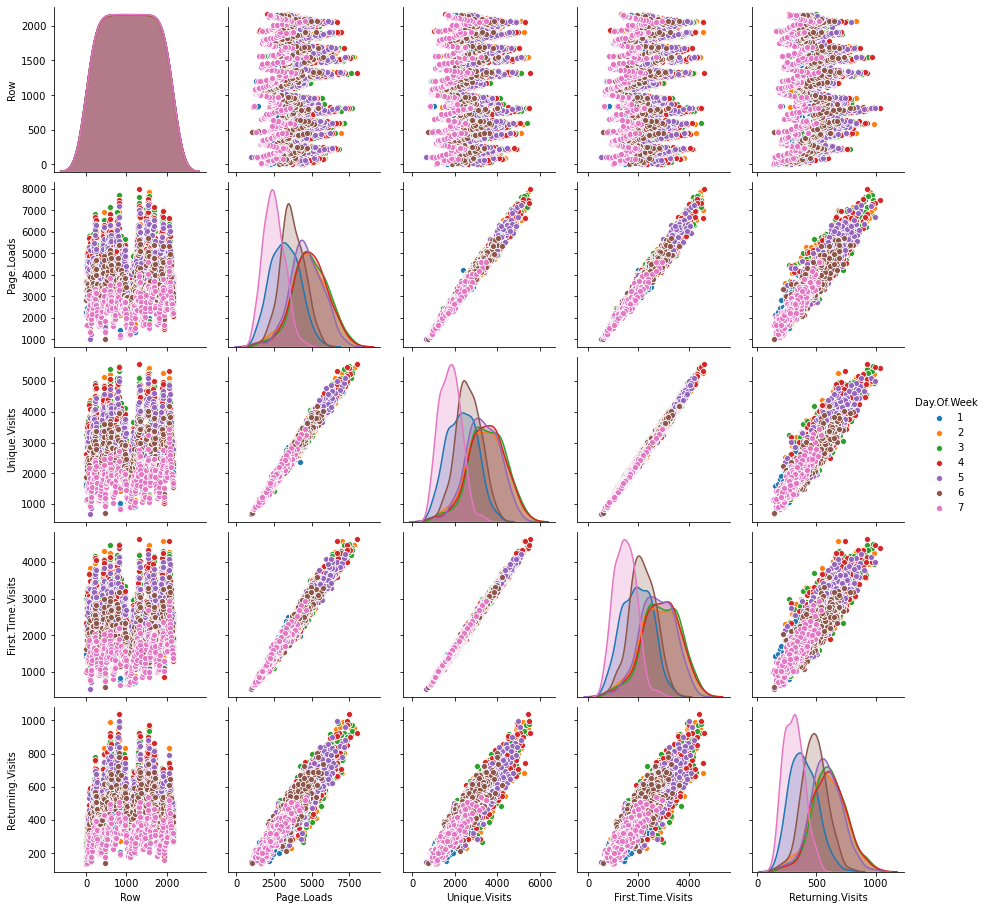

In [260]:
g = sns.pairplot(df, kind='scatter', hue='Day.Of.Week');

In [261]:
df.corr()

,Row,Day.Of.Week,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
Row,1.000000,0.000800,0.059412,0.078944,0.082316,0.053233
Day.Of.Week,0.000800,1.000000,-0.253006,-0.255127,-0.256785,-0.217418
Page.Loads,0.059412,-0.253006,1.000000,0.988691,0.980704,0.913340
Unique.Visits,0.078944,-0.255127,0.988691,1.000000,0.996164,0.902950
First.Time.Visits,0.082316,-0.256785,0.980704,0.996164,1.000000,0.861882
Returning.Visits,0.053233,-0.217418,0.913340,0.902950,0.861882,1.000000


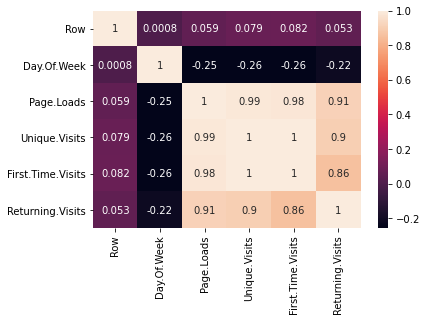

In [262]:
sns.heatmap(df.corr(), annot=True);

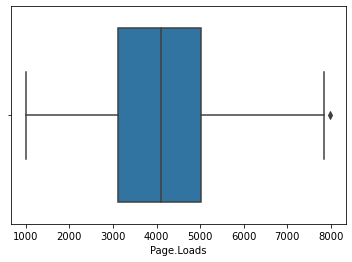

In [263]:
sns.boxplot(x=df['Page.Loads']);

In [264]:
#REMOVE OUTLIERS
dfw = df['Page.Loads']
dfw_Q1 = dfw.quantile(0.25)
dfw_Q3 = dfw.quantile(0.75)
dfw_IQR = dfw_Q3 - dfw_Q1
#DEVANSH VERMA
dfw_lowerend = dfw_Q1 - (1.5 * dfw_IQR)
dfw_upperend = dfw_Q3 + (1.5 * dfw_IQR)

In [265]:
dfw_outliers = dfw[(dfw < dfw_lowerend) | (dfw > dfw_upperend)]
dfw_outliers

1319    7984
Name: Page.Loads, dtype: int32

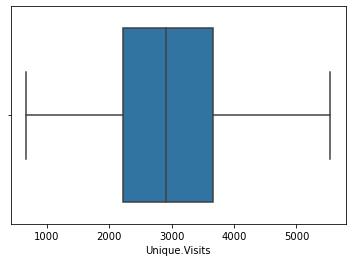

In [266]:
sns.boxplot(x=df['Unique.Visits']);

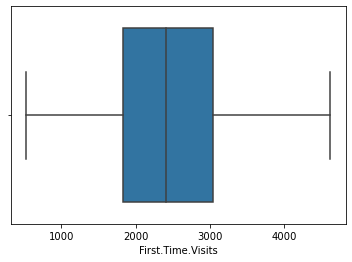

In [267]:
sns.boxplot(x=df['First.Time.Visits']);

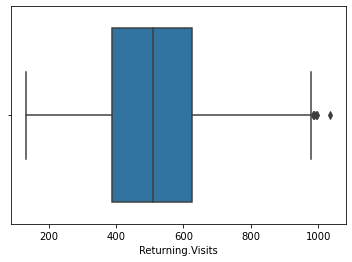

In [268]:
sns.boxplot(x=df['Returning.Visits']);

In [269]:
dfcro = df['Returning.Visits']
dfcro_Q1 = dfcro.quantile(0.25)
dfcro_Q3 = dfcro.quantile(0.75)
dfcro_IQR = dfcro_Q3 - dfcro_Q1
dfcro_lowerend = dfcro_Q1 - (1.5 * dfcro_IQR)
dfcro_upperend = dfcro_Q3 + (1.5 * dfcro_IQR)

dfcro_outliers = dfcro[(dfcro < dfcro_lowerend) | (dfcro > dfcro_upperend)]
dfcro_outliers

589     987
808    1036
813     987
815     998
816     993
821     985
Name: Returning.Visits, dtype: int32

In [270]:
df1=df.drop([589,808,813,815,816,821,1319 ]) 

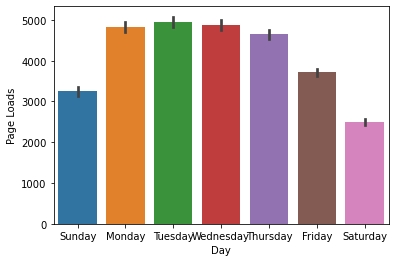

In [271]:
sns.barplot(x=df1['Day'], y=df1['Page.Loads']);
plt.xlabel('Day')
plt.ylabel('Page Loads')
plt.show()

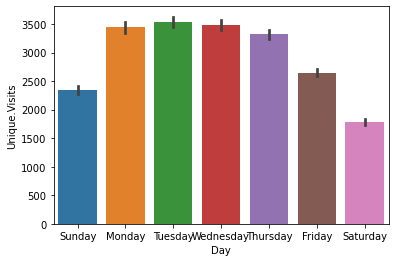

In [273]:
sns.barplot(x=df1['Day'], y=df1['Unique.Visits']);
plt.xlabel('Day')
plt.ylabel('Unique.Visits')
plt.show()

In [274]:
df1['Page.Loads'].mean()

4106.873611111111

In [276]:
#linear regression analysis

In [277]:
y = df1[['Unique.Visits']]#,'First.Time.Visits','Returning.Visits']]
X = df1[['Page.Loads']]

In [278]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [279]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [280]:
print('Model intercept: ', reg.intercept_)
print('Model coefficients: ', reg.coef_)

Model intercept:  [-2.94164914]
Model coefficients:  [[0.71569004]]


In [281]:
y_head = reg.predict(X_train)

In [282]:
r2_score(y_train, y_head)

0.9775748047221741

In [283]:
#Multiple Linear Regression analysis

In [285]:
y = df1['Unique.Visits']
X = df1.iloc[:,4:5]

In [286]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [287]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [288]:
print('Model intercept: ', reg.intercept_)
print('Model coefficients: ', reg.coef_)

Model intercept:  -2.9416491375759506
Model coefficients:  [0.71569004]


In [289]:
y_head = reg.predict(X_train)

In [290]:
r2_score(y_train, y_head)

0.9775748047221741

In [291]:
from sklearn.model_selection import cross_val_score
cross_val_score_train = cross_val_score(reg, X_train, y_train, cv=10, scoring='r2')
print(cross_val_score_train)

[0.97880623 0.976361   0.98066217 0.9801947  0.97578185 0.97499003
 0.9817054  0.97115175 0.97675806 0.97685176]


In [292]:
cross_val_score_train.mean()

0.977326294443046

In [293]:
y_pred = reg.predict(X_test)

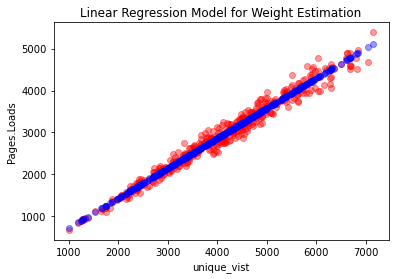

In [294]:
plt.scatter(X_test['Page.Loads'], y_test, color='red', alpha=0.4)
plt.scatter(X_test['Page.Loads'], y_pred, color='blue', alpha=0.4)
plt.xlabel('unique_vist')
plt.ylabel('Pages.Loads')
plt.title('Linear Regression Model for Weight Estimation');
#DEVANSH VERMA

In [295]:
y_pred1 = pd.DataFrame(y_pred, columns=['Predict Pages'])
y_pred1.head()

,Predict Pages
0,2114.785181
1,3814.549027
2,3498.929719
3,2782.523989
4,1438.458093


In [296]:
y_test1 = pd.DataFrame(y_test)
y_test1 = y_test1.reset_index(drop=True)
y_test1.head()

,Unique.Visits
0,2171
1,3821
2,3570
3,2841
4,1430


In [297]:
ynew = pd.concat([y_test1, y_pred1], axis=1)
ynew

,Unique.Visits,Predict Pages
0,2171,2114.785181
1,3821,3814.549027
2,3570,3498.929719
3,2841,2782.523989
4,1430,1438.458093
...,...,...
427,3194,3055.917584
428,3441,3352.213261
429,2579,2738.866896
430,1784,1681.077016
